# 1.Handle the missing values

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
data=pd.read_csv(r"C:\Users\yoojin\OneDrive\Desktop\diamonds_new (1).csv")

In [65]:
data

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [66]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [67]:
data.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [68]:
data.tail()

,carat,cut,color,clarity,table,x,y,z,price_new
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5
53939,0.75,Ideal,D,SI2,55.0,5.83,5.87,3.64,1378.5


In [69]:
data.shape

(53940, 9)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [71]:
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

# filling missing values

In [72]:
data.dtypes


carat        float64
cut           object
color         object
clarity       object
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

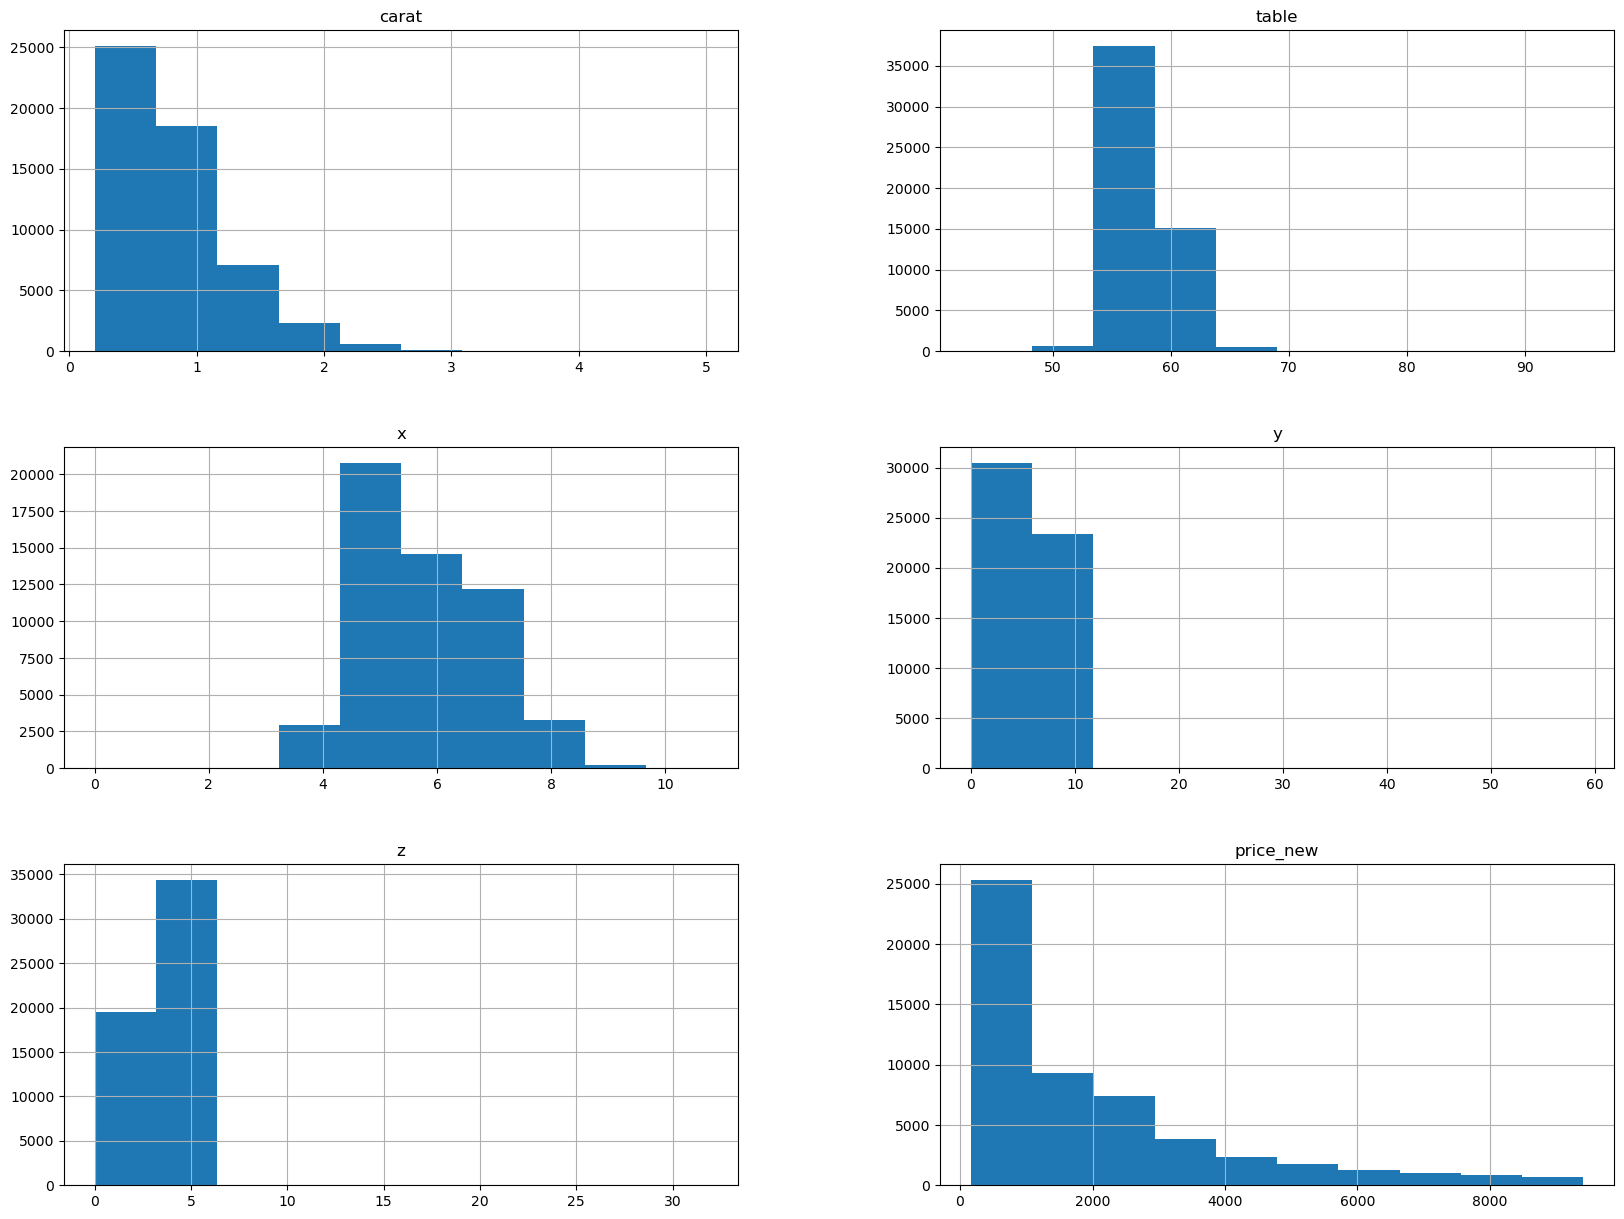

In [73]:
fraqgraph = data.select_dtypes(include=['float'])
fraqgraph.hist(figsize=(20,15))
plt.show

In [74]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [75]:
data['carat'] = data['carat'].fillna(data['carat'].median())
data['color'].fillna("G", inplace=True)

In [76]:
data.isna().sum()

carat         0
cut           0
color         0
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [77]:
for i in ['table', 'x', 'y', 'z','price_new']:
    data[i] = data[i].fillna(data[i].median())

In [78]:
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

In [79]:
data.groupby('price_new')['carat'].mean()

price_new
163.0     0.22
163.5     0.23
167.0     0.29
167.5     0.31
168.0     0.24
          ... 
9401.5    2.00
9402.0    2.07
9403.0    1.51
9409.0    2.00
9411.5    2.29
Name: carat, Length: 11602, dtype: float64

In [80]:
data.color.nunique()

7

# 2.Outlier Detection

Text(0.5, 1.0, 'Box plot of z')

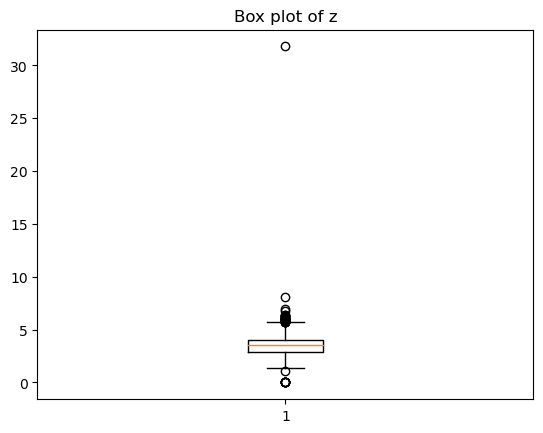

In [81]:
plt.boxplot(data['z'])
plt.title('Box plot of z')

In [82]:
Q1=np.percentile(data['z'],25,interpolation='midpoint')
Q2=np.percentile(data['z'],50,interpolation='midpoint')
Q3=np.percentile(data['z'],75,interpolation='midpoint')

C:\Users\yoojin\AppData\Local\Temp\ipykernel_14224\1571507535.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['z'],25,interpolation='midpoint')
C:\Users\yoojin\AppData\Local\Temp\ipykernel_14224\1571507535.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['z'],50,interpolation='midpoint')
C:\Users\yoojin\AppData\Local\Temp\ipykernel_14224\1571507535.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 

In [83]:
print(Q1)
print(Q2)
print(Q3)

2.91
3.53
4.04


In [84]:
data['z'].median()

3.53

In [85]:
IQR=Q3-Q1

In [86]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [87]:
print(low_lim)
print(up_lim)

1.2150000000000003
5.734999999999999


In [88]:
outlier=[]
for x in data['z']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [89]:
outlier


[0.0,
 0.0,
 1.07,
 0.0,
 5.77,
 5.76,
 5.97,
 5.98,
 5.91,
 5.79,
 6.38,
 8.06,
 5.85,
 5.92,
 6.03,
 0.0,
 6.17,
 6.24,
 5.75,
 6.16,
 0.0,
 6.27,
 6.31,
 6.13,
 5.86,
 6.43,
 6.98,
 0.0,
 5.9,
 5.9,
 5.77,
 5.77,
 6.72,
 6.03,
 31.8,
 0.0,
 0.0]

In [90]:
data[(data['x']==0) | (data['y']==0) | (data['z']==0)].index

Int64Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [91]:
ind1 = data['z']>up_lim
data.loc[ind1].index

Int64Index([16283, 17196, 19346, 21758, 22540, 23539, 23644, 24067, 24131,
            24297, 24328, 25998, 25999, 26100, 26194, 26431, 26444, 26534,
            26744, 27130, 27415, 27515, 27516, 27517, 27518, 27630, 27679,
            48410],
           dtype='int64')

In [92]:
data.drop([16283, 17196, 19346, 21758, 22540, 23539, 23644, 24067, 24131,
            24297, 24328, 25998, 25999, 26100, 26194, 26431, 26444, 26534,
            26744, 27130, 27415, 27515, 27516, 27517, 27518, 27630, 27679,
            48410], inplace=True)

Text(0.5, 1.0, 'Box plot of z')

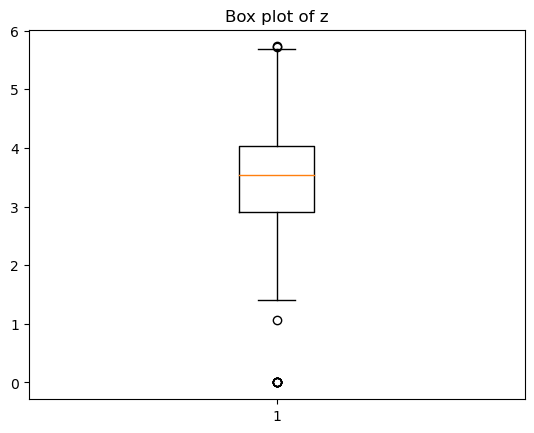

In [93]:
plt.boxplot(data['z'])
plt.title('Box plot of z')

Text(0.5, 1.0, 'Box plot of x')

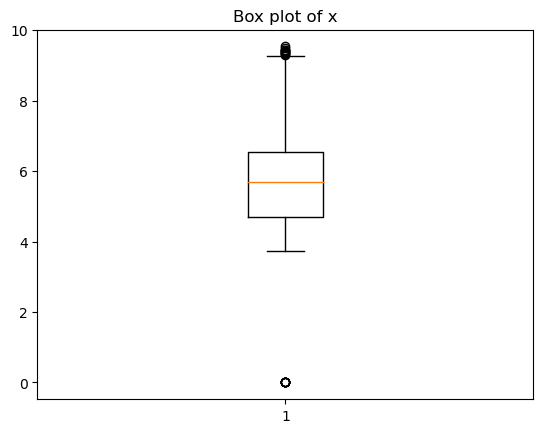

In [94]:
plt.boxplot(data['x'])
plt.title('Box plot of x')

In [95]:
Q1=np.percentile(data['x'],25,interpolation='midpoint')
Q2=np.percentile(data['x'],50,interpolation='midpoint')
Q3=np.percentile(data['x'],75,interpolation='midpoint')

C:\Users\soumy\AppData\Local\Temp\ipykernel_14224\1544870890.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['x'],25,interpolation='midpoint')
C:\Users\soumy\AppData\Local\Temp\ipykernel_14224\1544870890.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['x'],50,interpolation='midpoint')
C:\Users\soumy\AppData\Local\Temp\ipykernel_14224\1544870890.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'mi

In [96]:
print(Q1)
print(Q2)
print(Q3)

4.71
5.7
6.54


In [97]:
data['x'].median()

5.7

In [98]:
IQR=Q3-Q1

In [99]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [100]:
print(low_lim)
print(up_lim)

1.9649999999999999
9.285


In [101]:
outlier=[]
for x in data['x']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [102]:
outlier

[0.0,
 0.0,
 0.0,
 9.54,
 9.38,
 0.0,
 9.42,
 9.44,
 9.32,
 0.0,
 9.3,
 0.0,
 9.36,
 9.51,
 9.44,
 9.35,
 9.41,
 0.0,
 0.0]

In [103]:
ind1 = data['x']>up_lim
data.loc[ind1].index

Int64Index([22741, 22831, 24816, 25460, 25850, 26932, 27514, 27638, 27649,
            27684, 27685],
           dtype='int64')

In [104]:
data.drop([ 22741, 22831, 24816, 25460, 25850, 26932, 27514, 27638, 27649,
            27684, 27685], inplace=True)

Text(0.5, 1.0, 'Box plot of x')

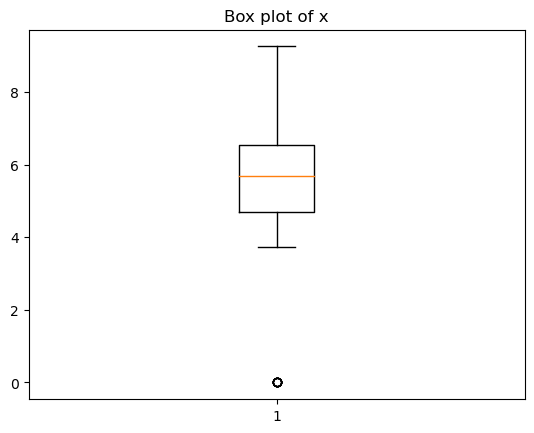

In [105]:
plt.boxplot(data['x'])
plt.title('Box plot of x')


Text(0.5, 1.0, 'Box plot of y')

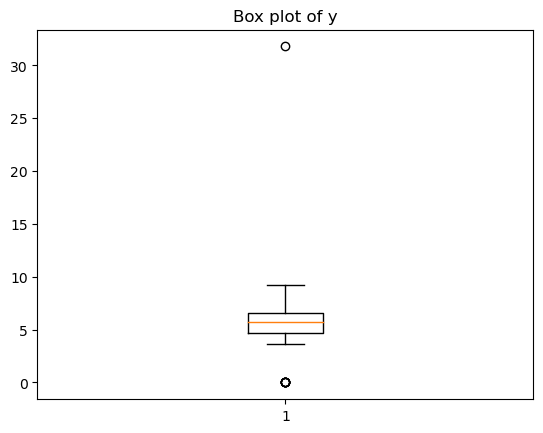

In [106]:
plt.boxplot(data['y'])
plt.title('Box plot of y')

In [107]:
Q1=np.percentile(data['y'],25,interpolation='midpoint')
Q2=np.percentile(data['y'],50,interpolation='midpoint')
Q3=np.percentile(data['y'],75,interpolation='midpoint')

C:\Users\yoojin\AppData\Local\Temp\ipykernel_14224\1613028508.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['y'],25,interpolation='midpoint')
C:\Users\yoojin\AppData\Local\Temp\ipykernel_14224\1613028508.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['y'],50,interpolation='midpoint')
C:\Users\yoojin\AppData\Local\Temp\ipykernel_14224\1613028508.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 

In [108]:
print(Q1)
print(Q2)
print(Q3)

4.72
5.71
6.54


In [109]:
data['y'].median()

5.71

In [110]:
IQR=Q3-Q1

In [111]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [112]:
print(low_lim)
print(up_lim)

1.9899999999999993
9.27


In [113]:
outlier=[]
for x in data['y']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [114]:
outlier

[0.0, 0.0, 0.0, 0.0, 0.0, 31.8, 0.0, 0.0]

In [115]:
ind1 = data['y']>up_lim
data.loc[ind1].index

Int64Index([49189], dtype='int64')

In [116]:
data.drop([49189 ], inplace=True)

Text(0.5, 1.0, 'Box plot of y')

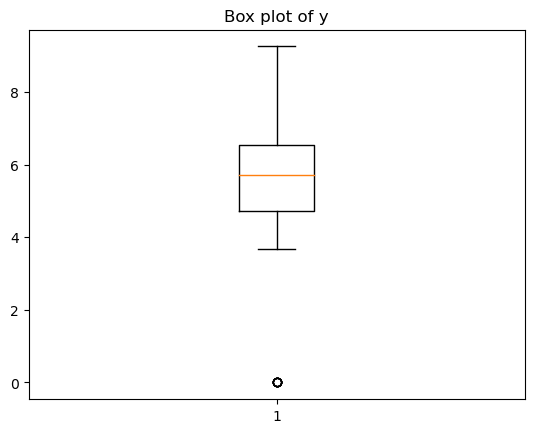

In [117]:
plt.boxplot(data['y'])
plt.title('Box plot of y')

Text(0.5, 1.0, 'Box plot of table')

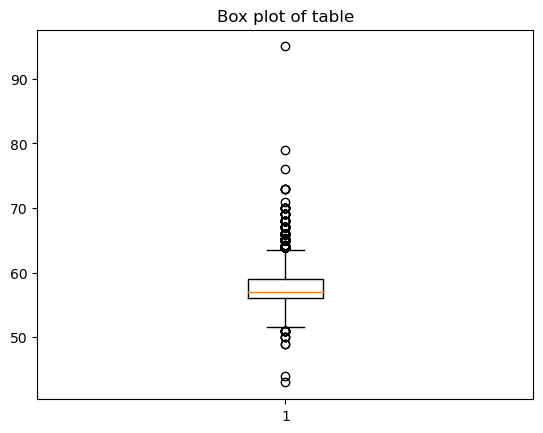

In [118]:
plt.boxplot(data['table'])
plt.title('Box plot of table')

In [119]:
Q1=np.percentile(data['table'],25,interpolation='midpoint')
Q2=np.percentile(data['table'],50,interpolation='midpoint')
Q3=np.percentile(data['table'],75,interpolation='midpoint')

C:\Users\yoojin\AppData\Local\Temp\ipykernel_14224\2066389225.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['table'],25,interpolation='midpoint')
C:\Users\yoojin\AppData\Local\Temp\ipykernel_14224\2066389225.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['table'],50,interpolation='midpoint')
C:\Users\yoojin\AppData\Local\Temp\ipykernel_14224\2066389225.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'high

In [120]:
print(Q1)
print(Q2)
print(Q3)

56.0
57.0
59.0


In [121]:
data['table'].median()

57.0

In [122]:
IQR=Q3-Q1

In [123]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [124]:
print(low_lim)
print(up_lim)

51.5
63.5


In [125]:
outlier=[]
for x in data['table']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [126]:
outlier

[65.0,
 69.0,
 64.0,
 64.0,
 67.0,
 64.0,
 66.0,
 70.0,
 66.0,
 68.0,
 64.0,
 64.0,
 67.0,
 67.0,
 65.0,
 70.0,
 64.0,
 69.0,
 65.0,
 64.0,
 66.0,
 64.0,
 67.0,
 67.0,
 66.0,
 64.0,
 65.0,
 66.0,
 51.0,
 67.0,
 66.0,
 66.0,
 64.0,
 65.0,
 66.0,
 65.0,
 65.0,
 64.0,
 67.0,
 65.0,
 64.0,
 66.0,
 65.0,
 68.0,
 64.0,
 64.0,
 64.0,
 65.0,
 64.0,
 66.0,
 66.0,
 66.0,
 50.1,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 65.0,
 64.0,
 64.0,
 51.0,
 64.0,
 65.0,
 51.0,
 64.0,
 64.0,
 66.0,
 64.0,
 64.0,
 66.0,
 65.0,
 64.0,
 64.0,
 64.0,
 65.0,
 64.0,
 67.0,
 65.0,
 65.0,
 64.0,
 65.0,
 65.0,
 65.0,
 66.0,
 65.0,
 64.0,
 65.0,
 67.0,
 66.0,
 64.0,
 68.0,
 64.0,
 65.0,
 65.0,
 64.0,
 65.0,
 64.0,
 64.0,
 66.0,
 64.0,
 64.0,
 64.0,
 66.0,
 65.0,
 49.0,
 65.0,
 66.0,
 66.0,
 67.0,
 67.0,
 65.0,
 67.0,
 66.0,
 64.0,
 65.0,
 66.0,
 67.0,
 65.0,
 64.0,
 65.0,
 65.0,
 64.0,
 64.0,
 65.0,
 64.0,
 50.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 65.0,
 66.0,
 64.0,
 64.0,
 67.0,
 64.0,
 65.0,
 68.0,
 66.0,

In [127]:
ind1 = data['table']>up_lim
data.loc[ind1].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=585)

In [128]:
data.drop([ 504,   526,   712,   771,   777,   868,   919,   929,   932,
             1140,
            52731, 52748, 52825, 52860, 52861, 52865, 52869, 52916, 53064,
            53154 ], inplace=True)

Text(0.5, 1.0, 'Box plot of table')

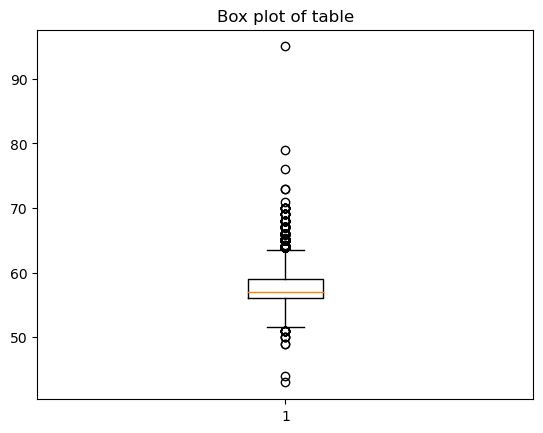

In [129]:
plt.boxplot(data['table'])
plt.title('Box plot of table')

In [130]:
data.shape

(53880, 9)

In [131]:
data['carat'] ** 0.5

0        0.479583
1        0.458258
2        0.479583
3        0.538516
4        0.556776
           ...   
53935    0.848528
53936    0.848528
53937    0.836660
53938    0.927362
53939    0.866025
Name: carat, Length: 53880, dtype: float64

In [132]:
data['sqrt_carat'] = data["carat"]**0.5

In [133]:
data

,carat,cut,color,clarity,table,x,y,z,price_new,sqrt_carat
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0,0.479583
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0,0.458258
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5,0.479583
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0,0.538516
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5,0.556776
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5,0.848528
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5,0.848528
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5,0.836660
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5,0.927362


In [134]:
data['carat'].skew()

1.0450628246169633

In [135]:
data['sqrt_carat'].skew()

0.5251698143717249

In [136]:
data['carat'].kurtosis()

0.7328292530589566

In [137]:
data['sqrt_carat'].kurtosis()

-0.5352792056824356

# 3.Encoding

In [138]:
data['color'].nunique()

7

In [139]:
data = pd.get_dummies(data)

In [140]:
data.head()

,carat,table,x,y,z,price_new,sqrt_carat,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,3.95,3.98,2.43,163.0,0.479583,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,3.89,3.84,2.31,163.0,0.458258,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,65.0,4.05,4.07,2.31,163.5,0.479583,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,58.0,4.20,4.23,2.63,167.0,0.538516,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,58.0,4.34,4.35,2.75,167.5,0.556776,0,1,0,...,0,1,0,0,0,1,0,0,0,0


<Axes: >

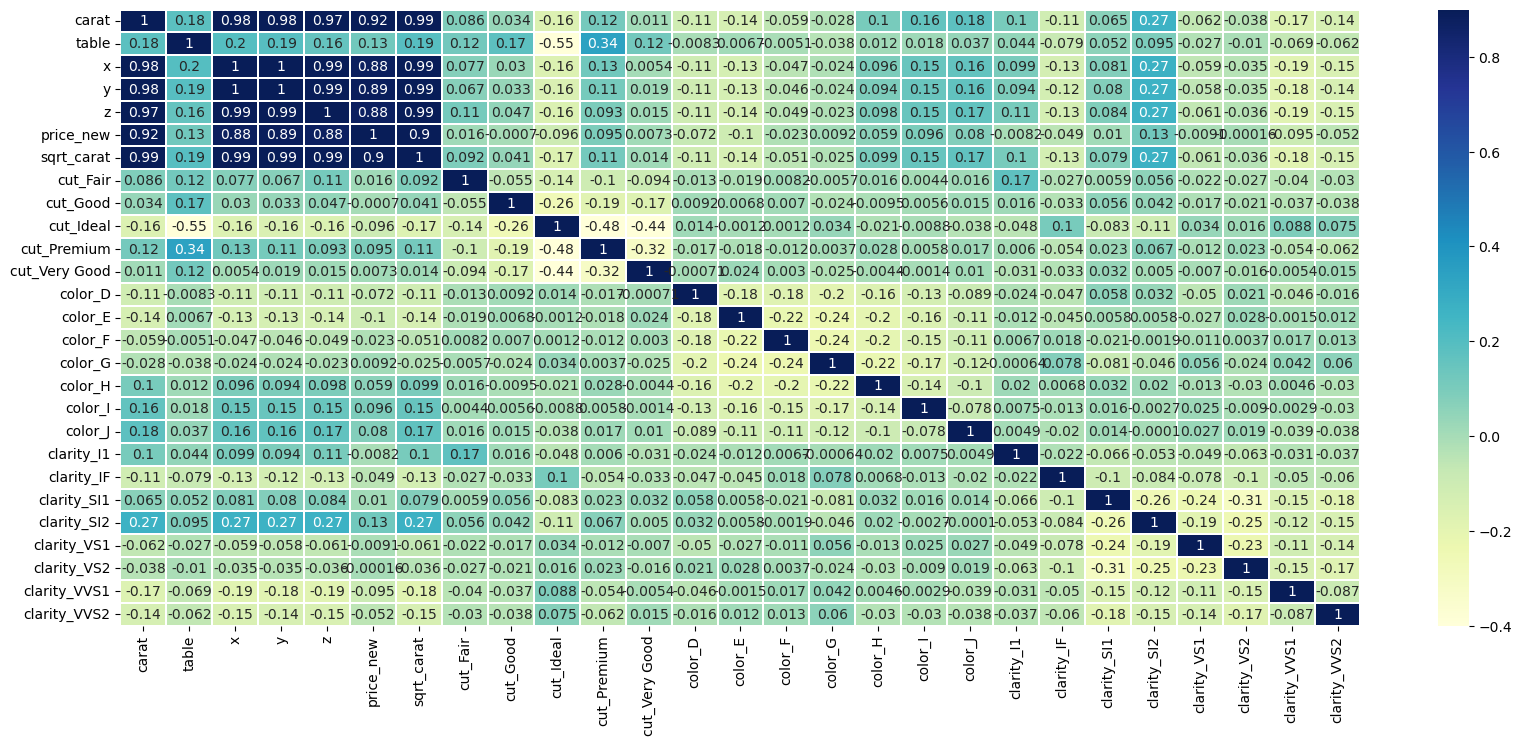

In [141]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='YlGnBu')

In [142]:
data.columns


Index(['carat', 'table', 'x', 'y', 'z', 'price_new', 'sqrt_carat', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [143]:
y = data['cut_Fair']
x = data.drop('cut_Fair',axis =1)

In [144]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.2)

In [145]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)

In [146]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 8.437754447227642e-30


In [147]:
from sklearn.metrics import r2_score
print('R sqaured value is:',r2_score(y_test,predictions))

R sqaured value is: 1.0


# 4.Scaling

In [148]:
x.describe()

,carat,table,x,y,z,price_new,sqrt_carat,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,...,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000
mean,0.796244,57.453189,5.728535,5.730547,3.537347,1962.849545,0.856052,0.090794,0.399907,0.255716,...,0.100316,0.051930,0.013344,0.033222,0.242372,0.170286,0.151578,0.227357,0.067836,0.094005
std,0.469586,2.226868,1.118103,1.109870,0.690485,1990.066311,0.251832,0.287319,0.489884,0.436267,...,0.300423,0.221888,0.114746,0.179217,0.428522,0.375887,0.358614,0.419129,0.251466,0.291839
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000,0.447214,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,474.500000,0.632456,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,57.000000,5.700000,5.710000,3.520000,1199.500000,0.836660,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,59.000000,6.540000,6.540000,4.030000,2658.500000,1.019804,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.050000,95.000000,9.260000,9.250000,5.730000,9411.500000,1.746425,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [149]:
type(x)

pandas.core.frame.DataFrame

In [150]:
type(data)

pandas.core.frame.DataFrame

In [151]:
from sklearn import preprocessing

In [152]:
standardisation = preprocessing.StandardScaler()
x = standardisation.fit_transform(x)

In [153]:
x=pd.DataFrame(x)

In [154]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,5.388000e+04,5.388000e+04,5.388000e+04,5.388000e+04,5.388000e+04,5.388000e+04,5.388000e+04,5.388000e+04,5.388000e+04,5.388000e+04,...,5.388000e+04,5.388000e+04,5.388000e+04,5.388000e+04,5.388000e+04,5.388000e+04,5.388000e+04,5.388000e+04,5.388000e+04,5.388000e+04
mean,1.139400e-16,9.695453e-16,1.012800e-16,-5.486002e-16,-1.101420e-15,4.220001e-18,1.139400e-16,1.529751e-17,-2.954001e-17,-1.160500e-17,...,5.275002e-17,5.591502e-17,-2.848501e-17,3.745251e-17,7.596003e-17,-3.165001e-17,-8.334503e-17,-3.165001e-17,-2.954001e-17,-3.376001e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,...,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.269733e+00,-6.490426e+00,-5.123490e+00,-5.163310e+00,-5.123039e+00,-9.044253e-01,-1.623475e+00,-3.160082e-01,-8.163387e-01,-5.861518e-01,...,-3.339173e-01,-2.340399e-01,-1.162968e-01,-1.853742e-01,-5.656049e-01,-4.530279e-01,-4.226797e-01,-5.424564e-01,-2.697638e-01,-3.221166e-01
25%,-8.438223e-01,-6.525766e-01,-9.109582e-01,-9.105184e-01,-9.085688e-01,-7.478964e-01,-8.878896e-01,-3.160082e-01,-8.163387e-01,-5.861518e-01,...,-3.339173e-01,-2.340399e-01,-1.162968e-01,-1.853742e-01,-5.656049e-01,-4.530279e-01,-4.226797e-01,-5.424564e-01,-2.697638e-01,-3.221166e-01
50%,-2.049558e-01,-2.035113e-01,-2.552155e-02,-1.851345e-02,-2.512300e-02,-3.835835e-01,-7.700539e-02,-3.160082e-01,-8.163387e-01,-5.861518e-01,...,-3.339173e-01,-2.340399e-01,-1.162968e-01,-1.853742e-01,-5.656049e-01,-4.530279e-01,-4.226797e-01,-5.424564e-01,-2.697638e-01,-3.221166e-01
75%,5.190929e-01,6.946193e-01,7.257581e-01,7.293291e-01,7.134956e-01,3.495647e-01,6.502483e-01,-3.160082e-01,1.224982e+00,1.706043e+00,...,-3.339173e-01,-2.340399e-01,-1.162968e-01,-1.853742e-01,-5.656049e-01,-4.530279e-01,-4.226797e-01,-5.424564e-01,-2.697638e-01,-3.221166e-01
max,4.799498e+00,1.686097e+01,3.158473e+00,3.171080e+00,3.175558e+00,3.742950e+00,3.535618e+00,3.164475e+00,1.224982e+00,1.706043e+00,...,2.994753e+00,4.272776e+00,8.598687e+00,5.394493e+00,1.768019e+00,2.207369e+00,2.365858e+00,1.843466e+00,3.706946e+00,3.104466e+00


In [155]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R sqaured value is:',r2_score(y_test,predictions))

MSE is: 8.129689580453231e-31
R sqaured value is: 1.0


# min max scaling

In [156]:
x = data.drop('cut_Fair',axis =1)

In [157]:
x.describe()

,carat,table,x,y,z,price_new,sqrt_carat,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,...,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000
mean,0.796244,57.453189,5.728535,5.730547,3.537347,1962.849545,0.856052,0.090794,0.399907,0.255716,...,0.100316,0.051930,0.013344,0.033222,0.242372,0.170286,0.151578,0.227357,0.067836,0.094005
std,0.469586,2.226868,1.118103,1.109870,0.690485,1990.066311,0.251832,0.287319,0.489884,0.436267,...,0.300423,0.221888,0.114746,0.179217,0.428522,0.375887,0.358614,0.419129,0.251466,0.291839
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000,0.447214,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,474.500000,0.632456,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,57.000000,5.700000,5.710000,3.520000,1199.500000,0.836660,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,59.000000,6.540000,6.540000,4.030000,2658.500000,1.019804,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.050000,95.000000,9.260000,9.250000,5.730000,9411.500000,1.746425,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [158]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))

In [159]:
x = min_max.fit_transform(x)

In [160]:
x = pd.DataFrame(x)

In [161]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,...,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000,53880.000000
mean,0.209208,0.277946,0.618632,0.619519,0.617338,0.194610,0.314682,0.090794,0.399907,0.255716,...,0.100316,0.051930,0.013344,0.033222,0.242372,0.170286,0.151578,0.227357,0.067836,0.094005
std,0.164767,0.042824,0.120745,0.119986,0.120503,0.215177,0.193834,0.287319,0.489884,0.436267,...,0.300423,0.221888,0.114746,0.179217,0.428522,0.375887,0.358614,0.419129,0.251466,0.291839
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.070175,0.250000,0.508639,0.510270,0.507853,0.033681,0.142580,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.175439,0.269231,0.615551,0.617297,0.614311,0.112072,0.299756,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.294737,0.307692,0.706263,0.707027,0.703316,0.269828,0.440721,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [162]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R sqaured value is:',r2_score(y_test,predictions))

MSE is: 2.2001869438026643e-31
R sqaured value is: 1.0
